Origin-Destination Matrix based on LODES 2017 IL commute data 

In [ ]:
import pandas as pd
import geopandas as gp

In [2]:
data = pd.read_csv('il_od_main_JT00_2017.csv')

In [3]:
data

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,170010001001001,170010001002019,1,0,0,1,0,0,1,0,1,0,20190825
1,170010001001001,170010001003006,1,0,0,1,0,1,0,1,0,0,20190825
2,170010001001001,170010001004018,1,1,0,0,1,0,0,1,0,0,20190825
3,170010001001001,170010002012002,1,1,0,0,0,1,0,0,1,0,20190825
4,170010001001001,170010002021000,1,0,1,0,0,1,0,1,0,0,20190825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200207,172030307003299,172030307003268,1,0,1,0,0,0,1,1,0,0,20190825
5200208,172030307003299,172030307003281,1,0,1,0,0,0,1,1,0,0,20190825
5200209,172030307003300,171239611003072,1,0,1,0,0,0,1,1,0,0,20190825
5200210,172030307003300,171790210005034,1,0,1,0,0,0,1,1,0,0,20190825


In [24]:
data2 = data.loc[:,('w_geocode','h_geocode','S000')]
data3 = gp.GeoDataFrame(data2)
trips = data3.loc[:][data3['S000'].values > 1]
trips.columns = ['GEOID10','GEOCODE', 'JOBS']
trips.loc[:,'GEOID10'] = trips.loc[:,'GEOID10'].astype(str)
trips.to_csv('origin_dest_list.csv', index = False)
trips

,GEOID10,GEOCODE,JOBS
73,170010001001007,170010002022017,2
135,170010001001017,170010002011028,2
145,170010001001017,170010005001023,2
149,170010001001017,170010005002013,2
154,170010001001017,170010008003016,2
...,...,...,...
5200114,172030307003299,171130059004003,2
5200175,172030307003299,172030307001016,2
5200176,172030307003299,172030307001021,2
5200195,172030307003299,172030307003119,2


In [98]:
blocks = gp.read_file('blocks.shp')
blocks

,GEOID10,geometry
0,170630009003008,POINT (-88.30782 41.19043)
1,170630009003003,POINT (-88.30830 41.19131)
2,170630009003020,POINT (-88.30967 41.18795)
3,170630009003013,POINT (-88.30973 41.18930)
4,170630009004016,POINT (-88.30519 41.18819)
...,...,...
451549,171950006003088,POINT (-90.12027 41.61314)
451550,171950007003113,POINT (-90.17459 41.59177)
451551,171950017003053,POINT (-89.69473 41.75665)
451552,171950006003067,POINT (-90.07842 41.65444)


In [99]:
blocks.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [44]:
blocks.columns

Index(['GEOID10', 'geometry'], dtype='object')

In [15]:
blocks.geometry = centroids
blocks = blocks.loc[:,('GEOID10','geometry')]
blocks.to_file('blocks.shp')

In [28]:
trips = trips.merge(blocks, on='GEOID10')

,GEOID10,GEOCODE,JOBS,geometry
0,170010001001007,170010002022017,2,POINT (-91.36562 39.96341)
1,170010001001017,170010002011028,2,POINT (-91.34349 39.94847)
2,170010001001017,170010005001023,2,POINT (-91.34349 39.94847)
3,170010001001017,170010005002013,2,POINT (-91.34349 39.94847)
4,170010001001017,170010008003016,2,POINT (-91.34349 39.94847)
...,...,...,...,...
249702,172030307003299,171130059004003,2,POINT (-89.00782 40.73781)
249703,172030307003299,172030307001016,2,POINT (-89.00782 40.73781)
249704,172030307003299,172030307001021,2,POINT (-89.00782 40.73781)
249705,172030307003299,172030307003119,2,POINT (-89.00782 40.73781)


In [41]:
trips.columns = ['GEOID_START','GEOID10','JOBS','geometry']
trips.loc[:,'GEOID10'] = trips.loc[:,'GEOID10'].astype(str)
trips

,GEOID_START,GEOID10,JOBS,geometry
0,170010001001007,170010002022017,2,POINT (-91.36562 39.96341)
1,170010001001017,170010002011028,2,POINT (-91.34349 39.94847)
2,170010001001017,170010005001023,2,POINT (-91.34349 39.94847)
3,170010001001017,170010005002013,2,POINT (-91.34349 39.94847)
4,170010001001017,170010008003016,2,POINT (-91.34349 39.94847)
...,...,...,...,...
249702,172030307003299,171130059004003,2,POINT (-89.00782 40.73781)
249703,172030307003299,172030307001016,2,POINT (-89.00782 40.73781)
249704,172030307003299,172030307001021,2,POINT (-89.00782 40.73781)
249705,172030307003299,172030307003119,2,POINT (-89.00782 40.73781)


In [45]:
trips = trips.merge(blocks,on='GEOID10')

In [47]:
trips.columns = ['GEOID_START','GEOID_END','JOBS','GEOMETRY_START','GEOMETRY_END']

In [117]:
trips = trips.loc[:,('GEOMETRY_START','GEOMETRY_END','JOBS')]
type(trips)

pandas.core.frame.DataFrame

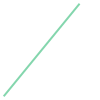

In [57]:
from shapely.geometry import Point, LineString
# type(LineString([Point(0, 0), Point(1, 1)]))
point1 = trips.iloc[0,0]
point2 = trips.iloc[1,0]
LineString([point1, point2])

In [118]:
table = []
for i in range(len(trips)):
    row = []
    point1 = trips.iloc[i,0]
    point2 = trips.iloc[i,1]
    row.append(point1.x)
    row.append(point1.y)
    row.append(point2.x)
    row.append(point2.y)
    row.append(LineString([point1, point2]))
    table.append(row)

In [119]:
lines = gp.GeoDataFrame(table)

In [120]:
lines

,0,1,2,3,4
0,-91.365620,39.963410,-91.391240,39.942338,LINESTRING (-91.36561978570937 39.963410266923...
1,-91.387938,39.936173,-91.391240,39.942338,LINESTRING (-91.38793765316188 39.936172904408...
2,-91.343488,39.948466,-91.393379,39.952333,LINESTRING (-91.34348834189011 39.948465903006...
3,-91.362397,39.953302,-91.393379,39.952333,LINESTRING (-91.3623970718586 39.9533024021171...
4,-91.363242,39.946684,-91.393379,39.952333,LINESTRING (-91.36324215488837 39.946683580713...
...,...,...,...,...,...
249702,-88.977814,40.805961,-89.023976,40.734395,LINESTRING (-88.9778136528507 40.8059607232909...
249703,-89.021302,40.745062,-89.023555,40.733762,LINESTRING (-89.02130217711561 40.745061632619...
249704,-89.021302,40.745062,-89.140827,40.740805,LINESTRING (-89.02130217711561 40.745061632619...
249705,-89.021302,40.745062,-89.016592,40.832018,LINESTRING (-89.02130217711561 40.745061632619...


In [121]:
lines = lines.join(trips)

In [122]:
lines.columns

Index([0, 1, 2, 3, 4, 'GEOMETRY_START', 'GEOMETRY_END', 'JOBS'], dtype='object')

In [123]:
lines.columns = ['START_X','START_Y','END_X','END_Y','geometry','g1','g2','jobs']

In [124]:
lines = lines.loc[:,('START_X','START_Y','END_X','END_Y','jobs','geometry')]

In [125]:
lines

,START_X,START_Y,END_X,END_Y,jobs,geometry
0,-91.365620,39.963410,-91.391240,39.942338,2,"LINESTRING (-91.36562 39.96341, -91.39124 39.9..."
1,-91.387938,39.936173,-91.391240,39.942338,2,"LINESTRING (-91.38794 39.93617, -91.39124 39.9..."
2,-91.343488,39.948466,-91.393379,39.952333,2,"LINESTRING (-91.34349 39.94847, -91.39338 39.9..."
3,-91.362397,39.953302,-91.393379,39.952333,2,"LINESTRING (-91.36240 39.95330, -91.39338 39.9..."
4,-91.363242,39.946684,-91.393379,39.952333,2,"LINESTRING (-91.36324 39.94668, -91.39338 39.9..."
...,...,...,...,...,...,...
249702,-88.977814,40.805961,-89.023976,40.734395,2,"LINESTRING (-88.97781 40.80596, -89.02398 40.7..."
249703,-89.021302,40.745062,-89.023555,40.733762,2,"LINESTRING (-89.02130 40.74506, -89.02356 40.7..."
249704,-89.021302,40.745062,-89.140827,40.740805,2,"LINESTRING (-89.02130 40.74506, -89.14083 40.7..."
249705,-89.021302,40.745062,-89.016592,40.832018,2,"LINESTRING (-89.02130 40.74506, -89.01659 40.8..."


In [126]:
lines.crs = "EPSG:4269"

In [127]:
lines.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [128]:
lines.to_file('real_flowlines2.shp')

In [131]:
lines.to_csv('real_flowlines4.csv')

In [1]:
import pandas as pd

In [7]:
ori_dest = pd.read_csv('origin_dest_list.csv')

In [11]:
ori_dest.columns = ['ORIGIN_GEOID','DEST_GEOID','JOBS']

In [37]:
ori_dest

,ORIGIN_GEOID,DEST_GEOID,JOBS
0,170010001001007,170010002022017,2
1,170010001001017,170010002011028,2
2,170010001001017,170010005001023,2
3,170010001001017,170010005002013,2
4,170010001001017,170010008003016,2
...,...,...,...
249702,172030307003299,171130059004003,2
249703,172030307003299,172030307001016,2
249704,172030307003299,172030307001021,2
249705,172030307003299,172030307003119,2


In [38]:
ori_dest.loc[:,'ORIGIN_GEOID'] = ori_dest.loc[:,'ORIGIN_GEOID'].astype(str)

In [39]:
ori_dest.loc[:,'ORIGIN_GEOID'] = ori_dest.loc[:,'ORIGIN_GEOID'].apply(lambda x : x[:-4])

In [41]:
ori_dest.loc[:,'DEST_GEOID'] = ori_dest.loc[:,'DEST_GEOID'].astype(str)

In [42]:
ori_dest.loc[:,'DEST_GEOID'] = ori_dest.loc[:,'DEST_GEOID'].apply(lambda x : x[:-4])

In [51]:
ori_dest

,ORIGIN_GEOID,DEST_GEOID,JOBS
0,17001000100,17001000202,2
1,17001000100,17001000201,2
2,17001000100,17001000500,2
3,17001000100,17001000500,2
4,17001000100,17001000800,2
...,...,...,...
249702,17203030700,17113005900,2
249703,17203030700,17203030700,2
249704,17203030700,17203030700,2
249705,17203030700,17203030700,2


In [53]:
ori_dest['COMBINED'] = ori_dest['ORIGIN_GEOID'] + ori_dest['DEST_GEOID']

In [54]:
ori_dest

,ORIGIN_GEOID,DEST_GEOID,JOBS,COMBINED
0,17001000100,17001000202,2,1700100010017001000202
1,17001000100,17001000201,2,1700100010017001000201
2,17001000100,17001000500,2,1700100010017001000500
3,17001000100,17001000500,2,1700100010017001000500
4,17001000100,17001000800,2,1700100010017001000800
...,...,...,...,...
249702,17203030700,17113005900,2,1720303070017113005900
249703,17203030700,17203030700,2,1720303070017203030700
249704,17203030700,17203030700,2,1720303070017203030700
249705,17203030700,17203030700,2,1720303070017203030700


In [58]:
jobs = pd.DataFrame(ori_dest.groupby('COMBINED', as_index = False).agg({'JOBS' : 'sum'}))

In [60]:
jobs['ORIGIN'] = jobs['COMBINED'].apply(lambda x : x[:11])

In [62]:
jobs['DEST'] = jobs['COMBINED'].apply(lambda x : x[11:])

In [67]:
jobs = jobs.drop(columns = 'COMBINED')

In [96]:
jobs = jobs.loc[:,('ORIGIN','DEST','JOBS')]

In [97]:
jobs.coluns 

,ORIGIN,DEST,JOBS
0,17001000100,17001000100,139
1,17001000100,17001000201,40
2,17001000100,17001000202,62
3,17001000100,17001000400,65
4,17001000100,17001000500,58
...,...,...,...
80423,17203030700,17113005201,2
80424,17203030700,17113005700,4
80425,17203030700,17113005900,2
80426,17203030700,17203030200,6


In [98]:
trips_ori = jobs.groupby('ORIGIN', as_index = False).sum()

In [102]:
trips_ori.columns = ['GEOID','TRIPS_ORIGIN']

In [74]:
trips_dest = jobs.groupby('DEST', as_index = False).sum()

In [84]:
trips_dest.columns = ['GEOID','TRIPS_DEST']

In [76]:
import geopandas as gp

In [87]:
tracts = gp.read_file('tracts_with_pop_zip_stores.shp')

In [88]:
tracts

,GEOID,POPULATION,ZIP_CODES,STORES,geometry
0,17091011700,3417,0,0.0,"POLYGON ((-87.88768 41.13594, -87.88764 41.136..."
1,17091011800,2627,0,0.0,"POLYGON ((-87.89410 41.14388, -87.89400 41.143..."
2,17119400951,4966,0,0.0,"POLYGON ((-90.11192 38.70281, -90.11128 38.703..."
3,17119400952,3335,0,0.0,"POLYGON ((-90.09442 38.72031, -90.09360 38.720..."
4,17135957500,3273,['62533' '62560'],0.0,"POLYGON ((-89.70369 39.34803, -89.69928 39.348..."
...,...,...,...,...,...
3118,17037000100,6712,['60135'],0.0,"POLYGON ((-88.73488 42.10620, -88.73483 42.106..."
3119,17037001500,3807,0,0.0,"POLYGON ((-88.78378 41.84907, -88.77716 41.860..."
3120,17037000400,8622,['60178'],0.0,"POLYGON ((-88.78353 42.06425, -88.78350 42.064..."
3121,17037000300,2680,['60111' '60150'],0.0,"POLYGON ((-88.94215 42.06505, -88.94211 42.065..."


In [104]:
tracts = tracts.join(trips_ori.set_index('GEOID'), on = 'GEOID')

In [105]:
tracts = tracts.join(trips_dest.set_index('GEOID'), on = 'GEOID')

In [108]:
tracts.fillna(0)

,GEOID,POPULATION,ZIP_CODES,STORES,geometry,TRIPS_ORIGIN,TRIPS_DEST
0,17091011700,3417,0,0.0,"POLYGON ((-87.88768 41.13594, -87.88764 41.136...",27.0,111.0
1,17091011800,2627,0,0.0,"POLYGON ((-87.89410 41.14388, -87.89400 41.143...",93.0,141.0
2,17119400951,4966,0,0.0,"POLYGON ((-90.11192 38.70281, -90.11128 38.703...",433.0,299.0
3,17119400952,3335,0,0.0,"POLYGON ((-90.09442 38.72031, -90.09360 38.720...",4.0,155.0
4,17135957500,3273,['62533' '62560'],0.0,"POLYGON ((-89.70369 39.34803, -89.69928 39.348...",34.0,45.0
...,...,...,...,...,...,...,...
3118,17037000100,6712,['60135'],0.0,"POLYGON ((-88.73488 42.10620, -88.73483 42.106...",145.0,245.0
3119,17037001500,3807,0,0.0,"POLYGON ((-88.78378 41.84907, -88.77716 41.860...",346.0,156.0
3120,17037000400,8622,['60178'],0.0,"POLYGON ((-88.78353 42.06425, -88.78350 42.064...",13.0,499.0
3121,17037000300,2680,['60111' '60150'],0.0,"POLYGON ((-88.94215 42.06505, -88.94211 42.065...",110.0,59.0


In [109]:
tracts.to_file('tracts_with_od_trips.shp')

In [86]:
tracts

,GEOID,POPULATION,ZIP_CODES,STORES,geometry,TRIPS_ORI
0,17091011700,3417,0,0.0,"POLYGON ((-87.88768 41.13594, -87.88764 41.136...",27
1,17091011800,2627,0,0.0,"POLYGON ((-87.89410 41.14388, -87.89400 41.143...",93
2,17119400951,4966,0,0.0,"POLYGON ((-90.11192 38.70281, -90.11128 38.703...",433
3,17119400952,3335,0,0.0,"POLYGON ((-90.09442 38.72031, -90.09360 38.720...",4
4,17135957500,3273,['62533' '62560'],0.0,"POLYGON ((-89.70369 39.34803, -89.69928 39.348...",34
...,...,...,...,...,...,...
2884,17037000100,6712,['60135'],0.0,"POLYGON ((-88.73488 42.10620, -88.73483 42.106...",145
2885,17037001500,3807,0,0.0,"POLYGON ((-88.78378 41.84907, -88.77716 41.860...",346
2886,17037000400,8622,['60178'],0.0,"POLYGON ((-88.78353 42.06425, -88.78350 42.064...",13
2887,17037000300,2680,['60111' '60150'],0.0,"POLYGON ((-88.94215 42.06505, -88.94211 42.065...",110
